In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Read Data

In [2]:
data = pd.read_csv('data_weather.csv')

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## Visualization

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Temperature distribution

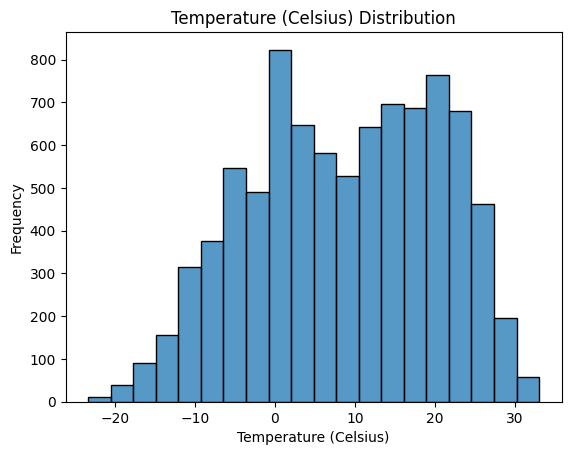

In [7]:
sns.histplot(data['Temp_C'], bins=20)
plt.title('Temperature (Celsius) Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

## Relative Humidity Distribution

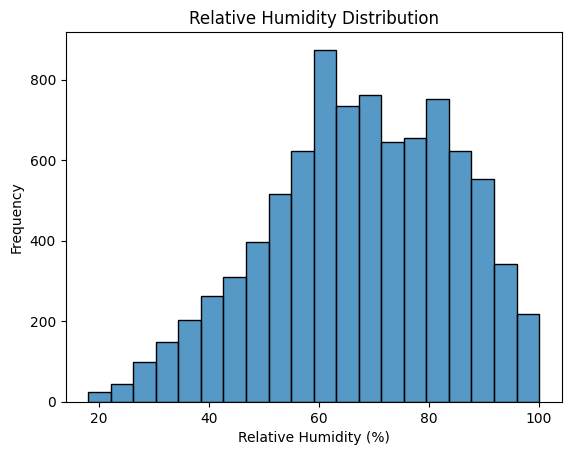

In [8]:
sns.histplot(data['Rel Hum_%'], bins=20)
plt.title('Relative Humidity Distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

## Temperature vs. Dew Point Temperature

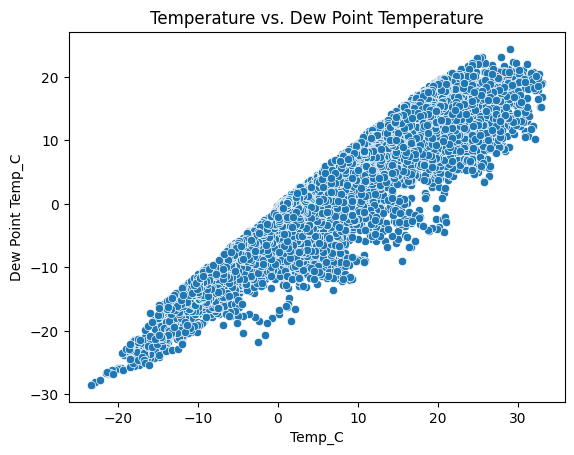

In [9]:
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data)
plt.title('Temperature vs. Dew Point Temperature')
plt.show()

## Wind Speed vs. Visibility

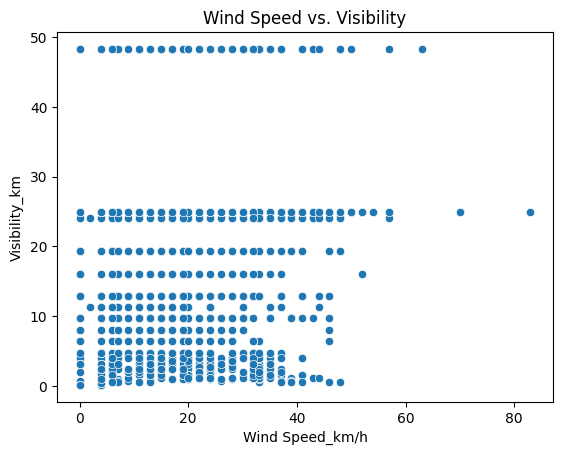

In [10]:
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', data=data)
plt.title('Wind Speed vs. Visibility')
plt.show()

## Weather Types

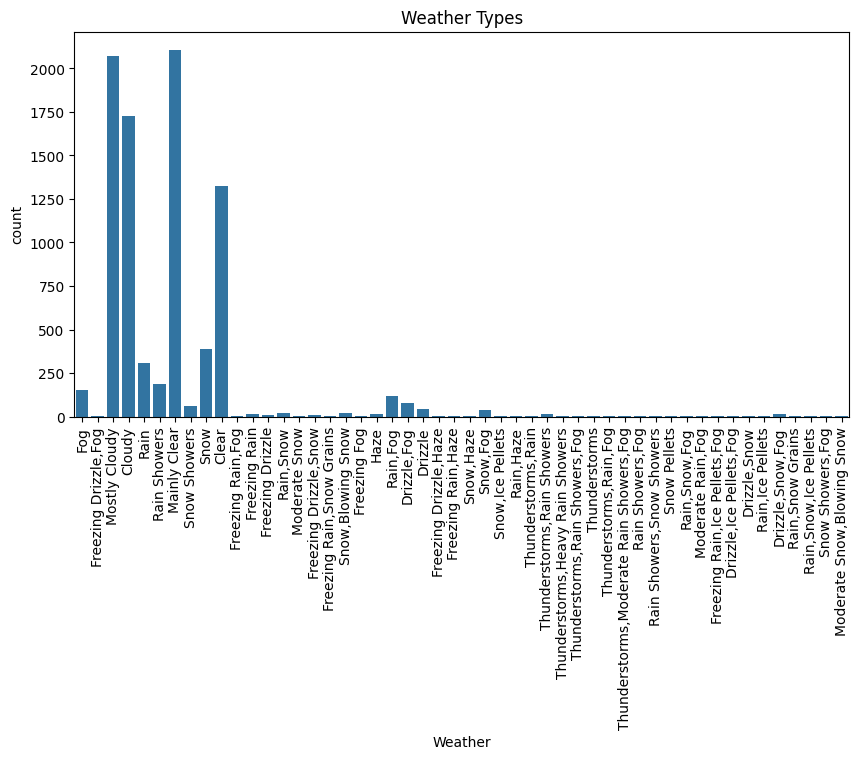

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Weather', data=data)
plt.xticks(rotation=90)
plt.title('Weather Types')
plt.show()

## Temperature Variation Over Time

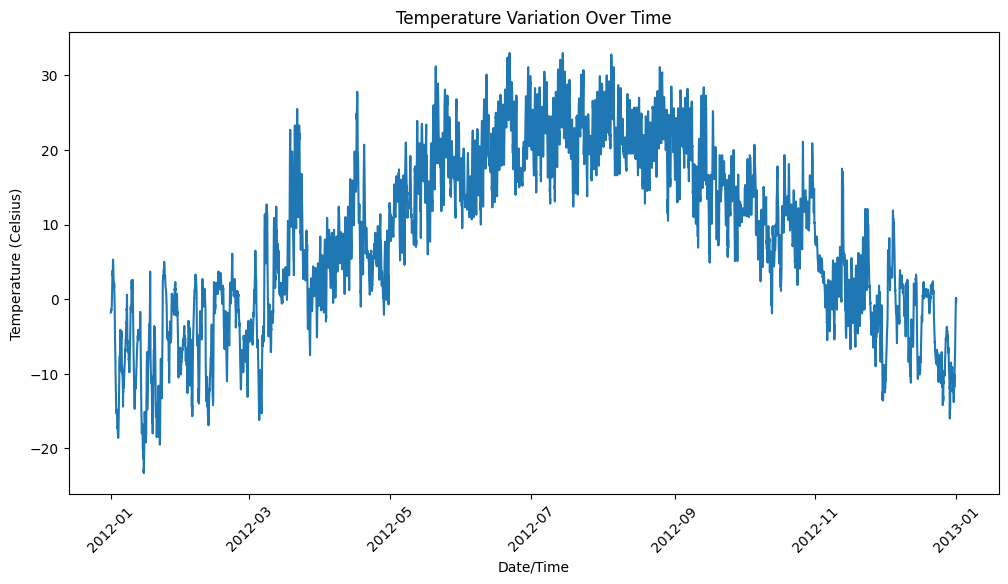

In [12]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Temp_C', data=data)
plt.title('Temperature Variation Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.show()

## Temperature Variation by Weather Type

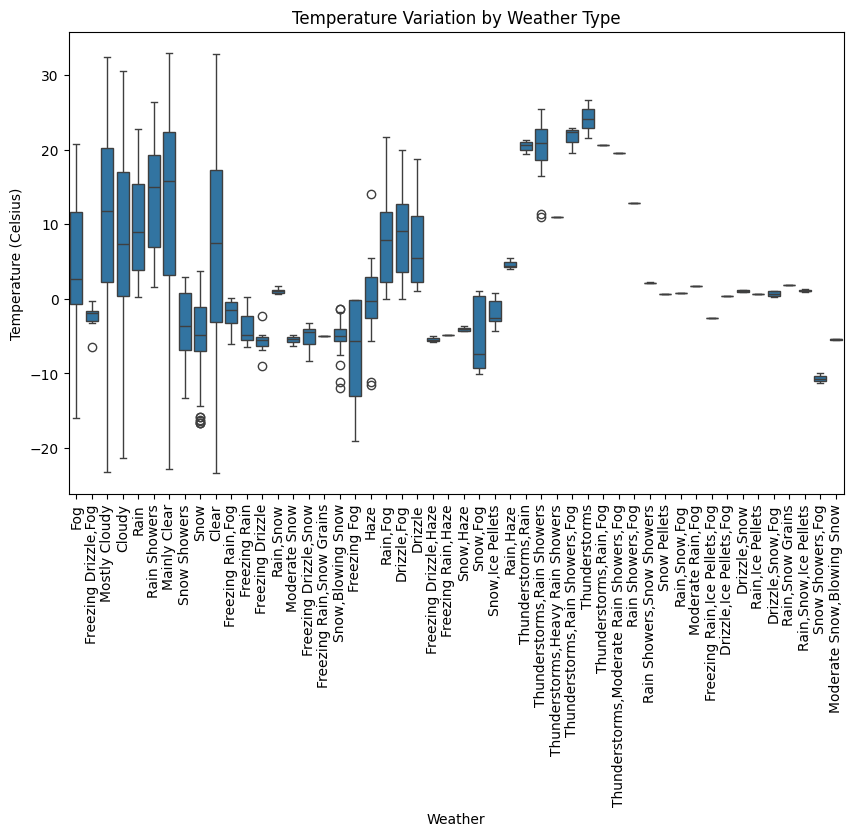

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Temp_C', data=data)
plt.title('Temperature Variation by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=90)
plt.show()

## Pair Plot of Numerical Variables

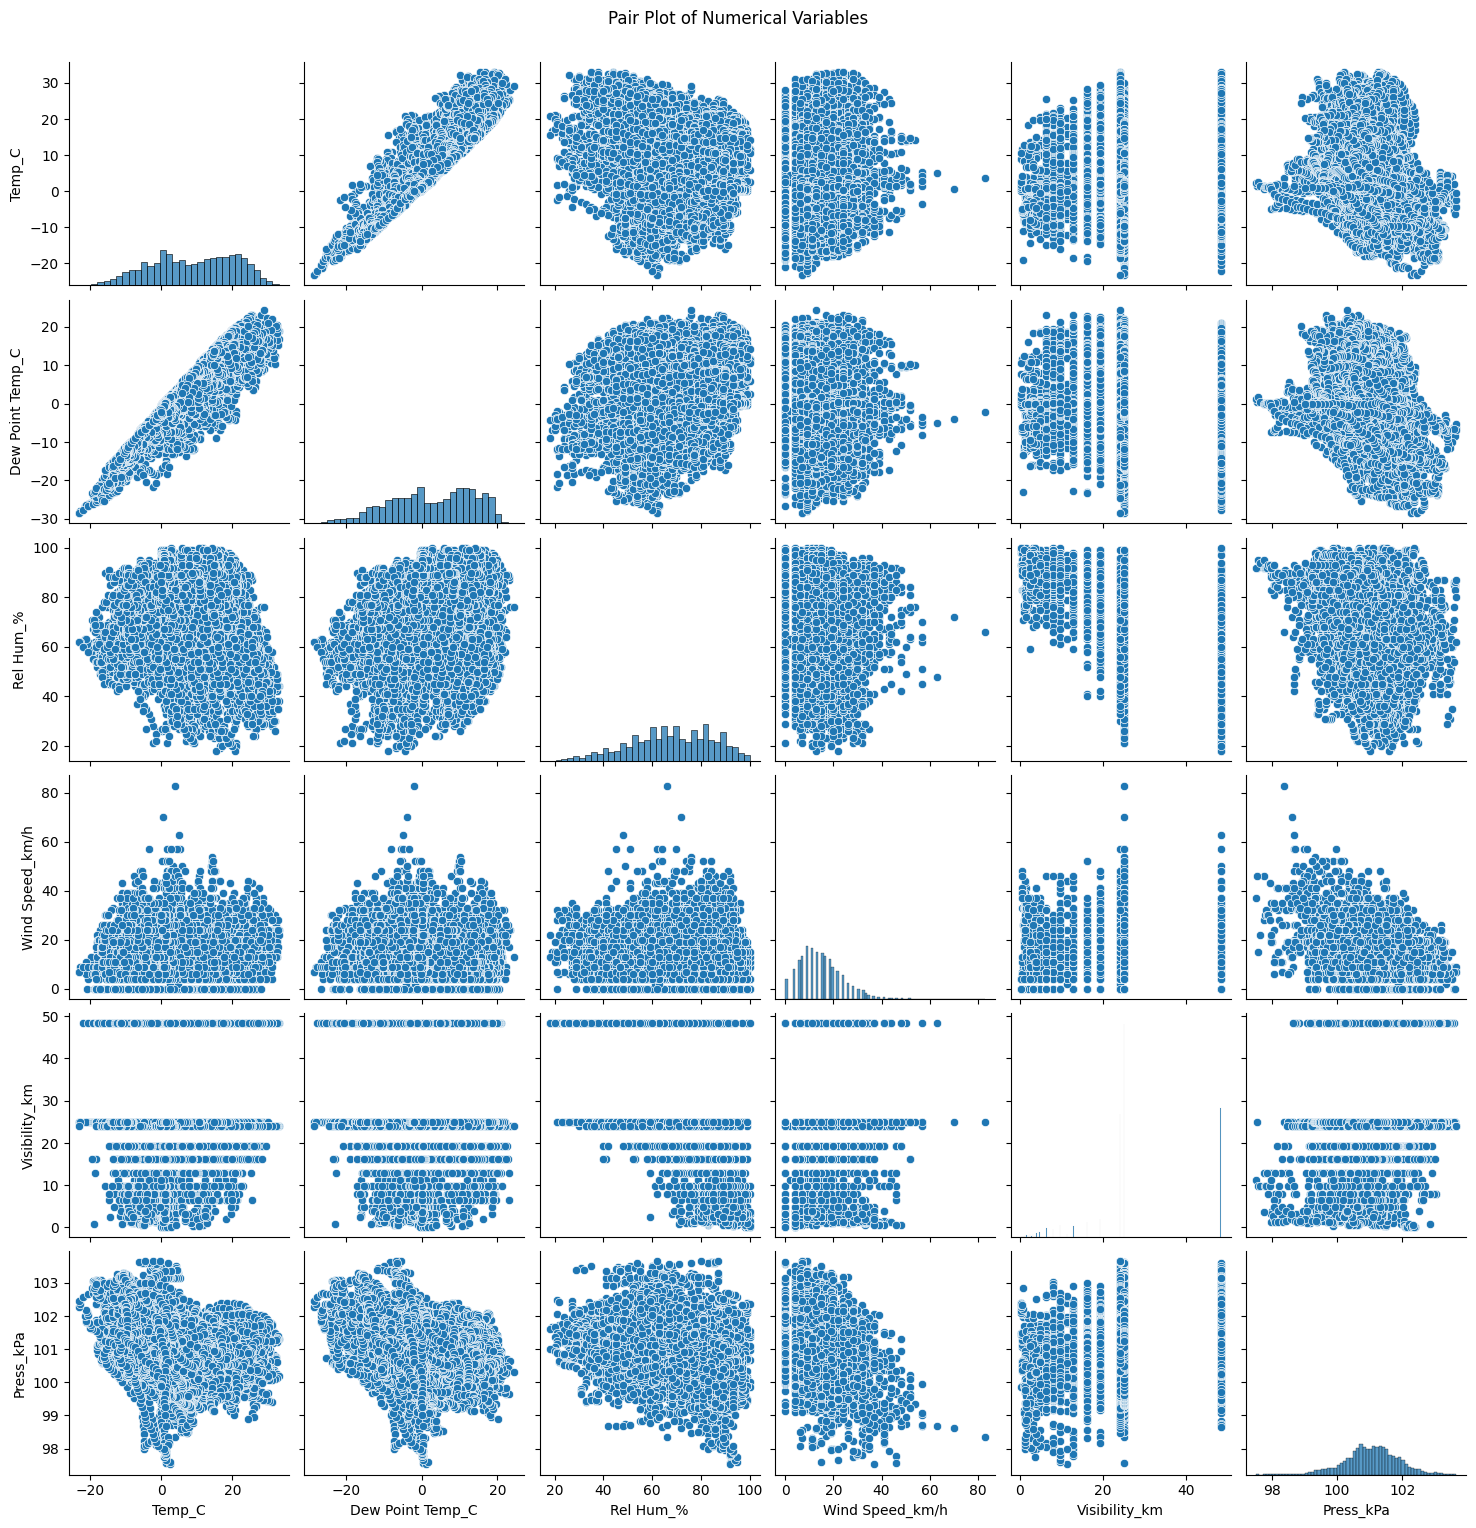

In [14]:
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

## Correlation Heatmap

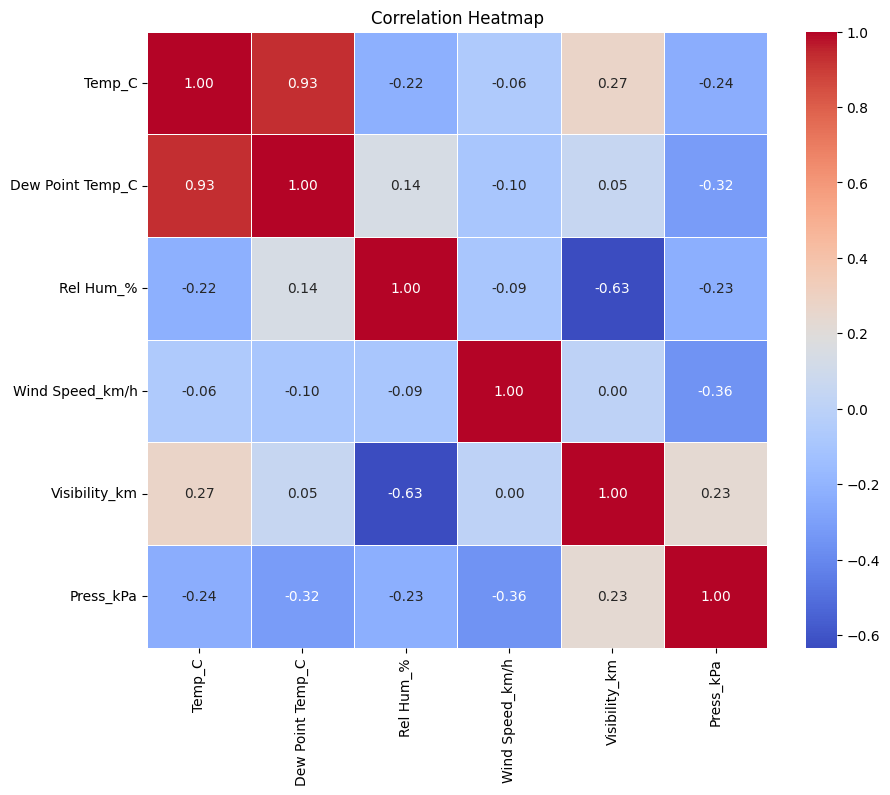

In [15]:
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Wind Speed Category

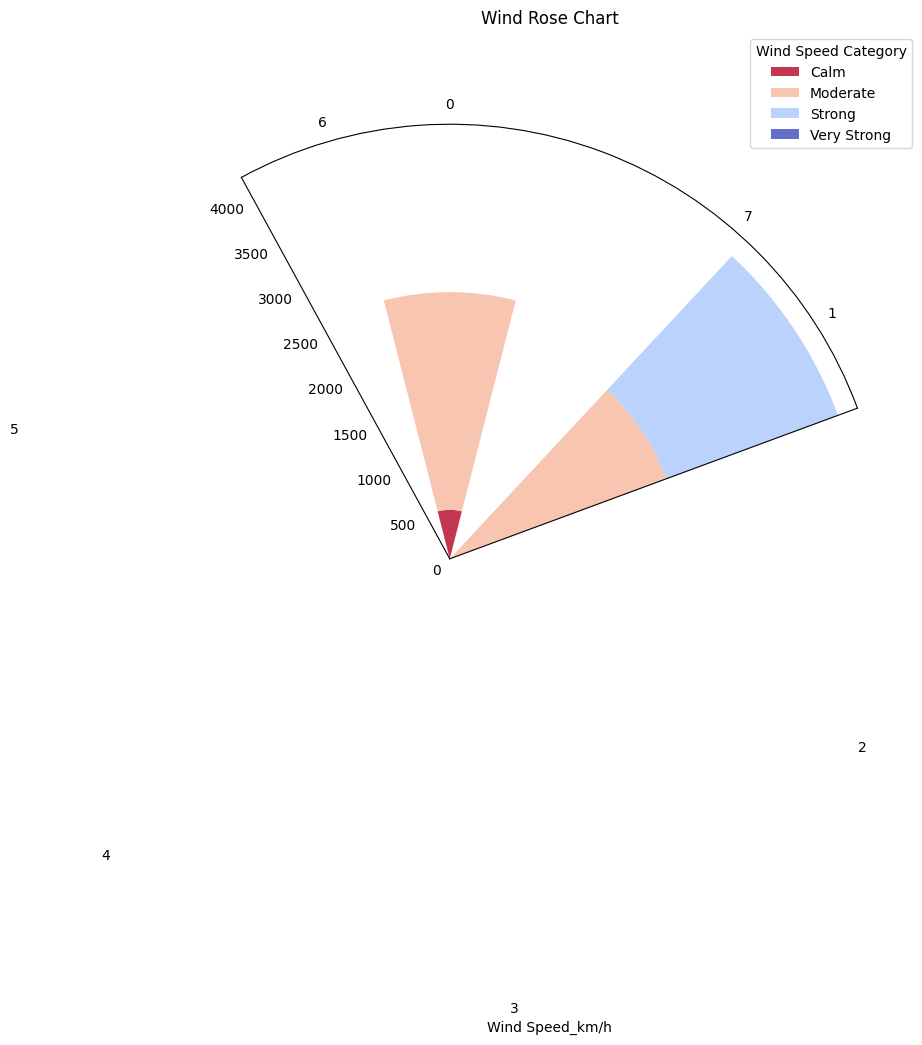

In [16]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

data['Wind Speed Category'] = pd.cut(data['Wind Speed_km/h'], bins=[0, 5, 15, 30, 100], labels=['Calm', 'Moderate', 'Strong', 'Very Strong'])

wind_directions = data['Wind Speed Category'].groupby(pd.cut(data['Wind Speed_km/h'], bins=8, labels=False)).value_counts().unstack(fill_value=0)
wind_directions.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm_r', alpha=0.8)

plt.title('Wind Rose Chart')
plt.legend(title='Wind Speed Category', bbox_to_anchor=(1.1, 1))
plt.show()

## Word Cloud of Weather Categories

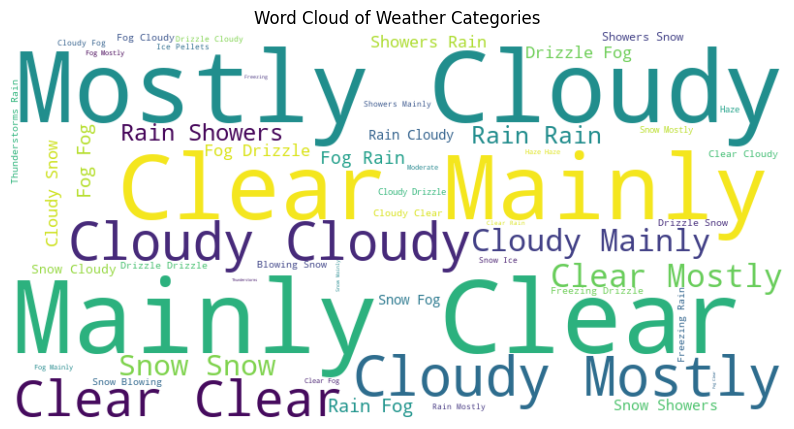

In [20]:
from wordcloud import WordCloud

all_weather_text = ' '.join(data['Weather'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_weather_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weather Categories')
plt.show()

## Joint Distribution Plot of Temperature and Relative Humidity

<Figure size 800x600 with 0 Axes>

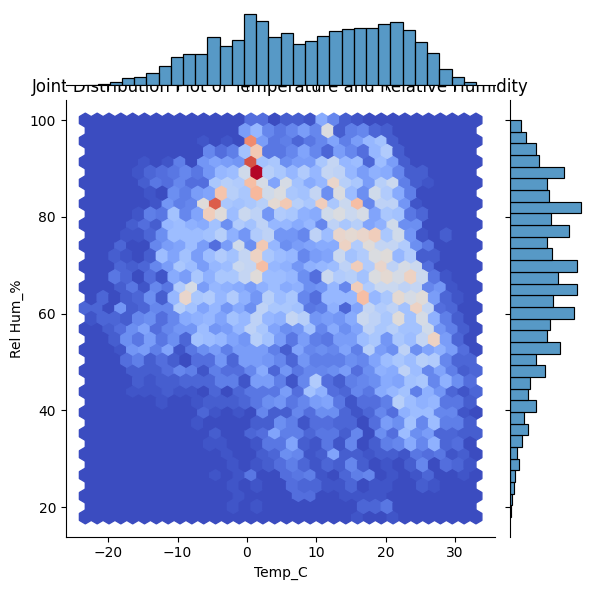

In [21]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Temp_C', y='Rel Hum_%', data=data, kind='hex', cmap='coolwarm')
plt.title('Joint Distribution Plot of Temperature and Relative Humidity')
plt.show()

## Stacked Area Chart of Weather Categories over Time

<Figure size 1200x600 with 0 Axes>

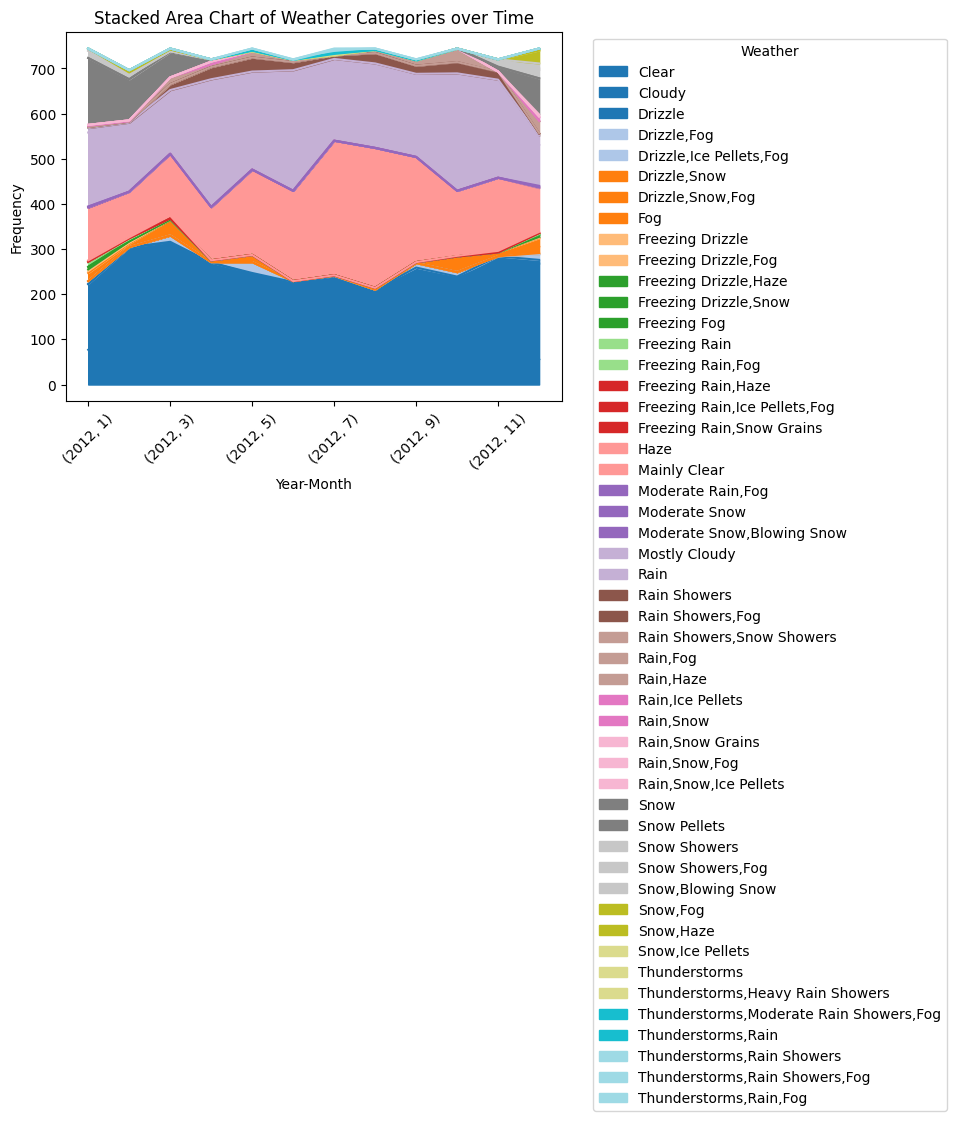

In [22]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month

weather_counts_by_month = data.groupby(['Year', 'Month', 'Weather'])['Weather'].count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
weather_counts_by_month.plot.area(stacked=True, colormap='tab20')
plt.title('Stacked Area Chart of Weather Categories over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Prediction of Weather

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('data_weather.csv')
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


## Encoding

In [27]:
label_encoder = LabelEncoder()
data['Weather_Label'] = label_encoder.fit_transform(data['Weather'])

median_wind_speed = data['Wind Speed_km/h'].loc[data['Wind Speed_km/h'] != 'Calm'].median()
data.loc[data['Wind Speed_km/h'] == 'Calm', 'Wind Speed_km/h'] = median_wind_speed
data['Wind Speed_km/h'] = data['Wind Speed_km/h'].astype(float)

X = data.drop(['Weather', 'Date/Time', 'Weather_Label'], axis=1)
y = data['Weather_Label']

In [28]:
scaler = StandardScaler()
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

## Data Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

In [30]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [31]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [53]:
model = RandomForestClassifier(random_state=42)

In [33]:
knn = KNeighborsClassifier()

In [34]:
svm = SVC()

In [35]:
naive_bayes = GaussianNB()

In [36]:
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [54]:
classifiers = [logistic_regression, decision_tree, random_forest, knn, svm, naive_bayes, gradient_boosting]
classifier_names = ['Logistic Regression', 'Decision Tree', 'model', 'KNN', 'SVM', 'Naive Bayes', 'Gradient Boosting']

## Ploting of Accuracy and Confusion Matrix

In [55]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

Logistic Regression Accuracy: 0.38076266363118955


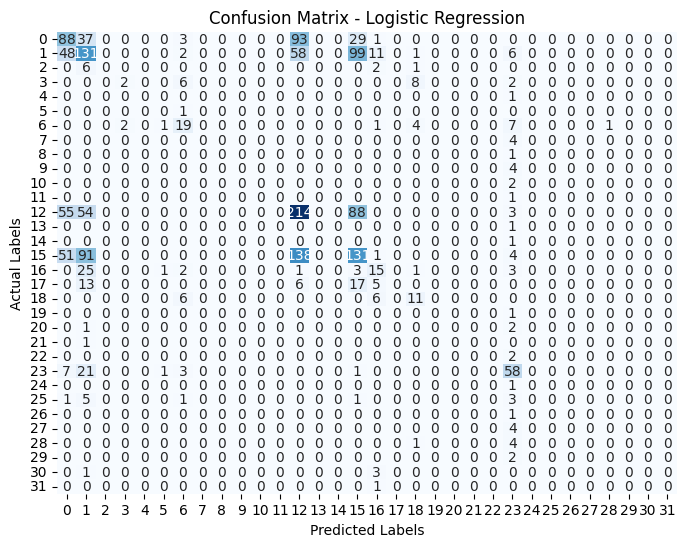

Decision Tree Accuracy: 0.4541832669322709


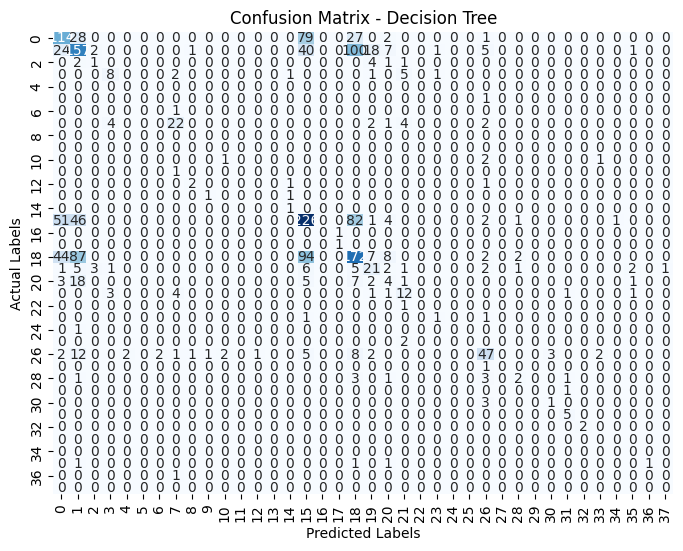

model Accuracy: 0.5395560614684121


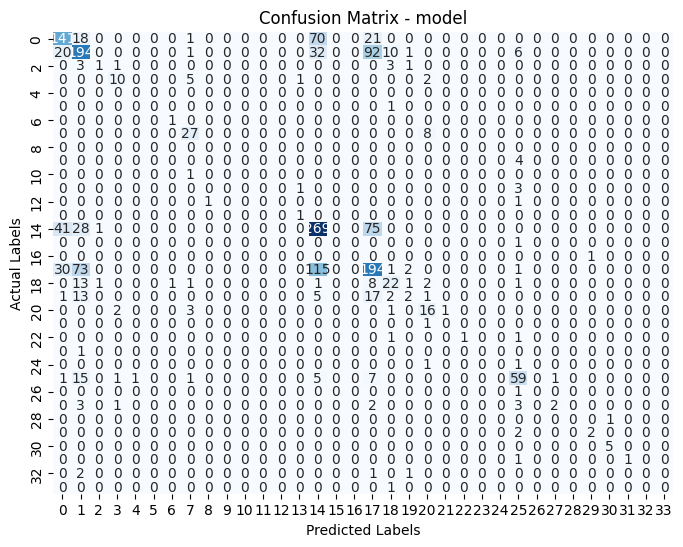

KNN Accuracy: 0.45987478656801367


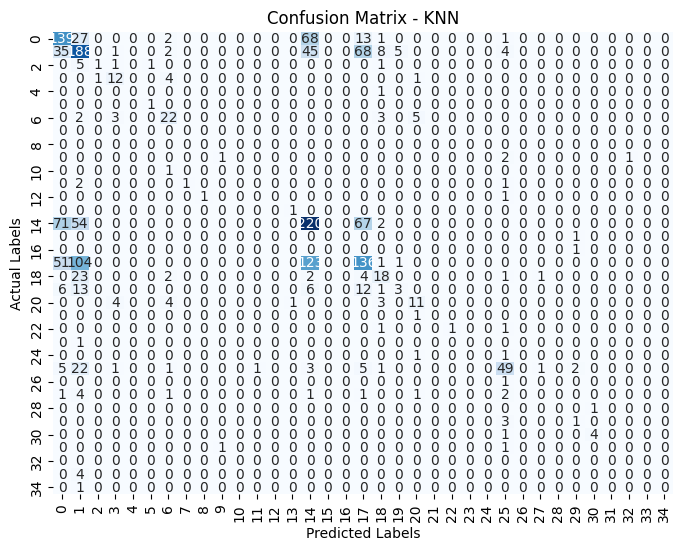

SVM Accuracy: 0.40466704610130905


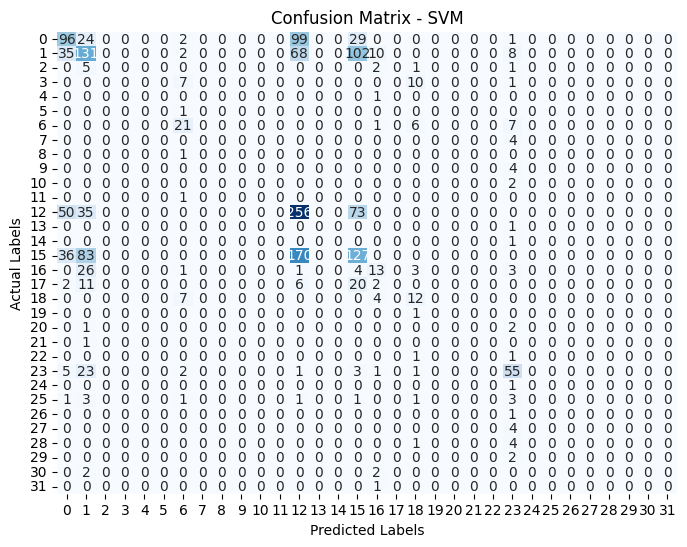

Naive Bayes Accuracy: 0.3409220261809903


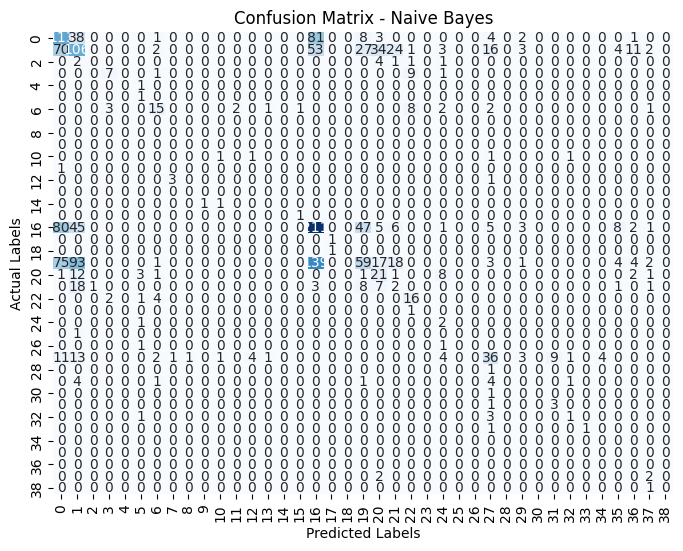

Gradient Boosting Accuracy: 0.4473534433693796


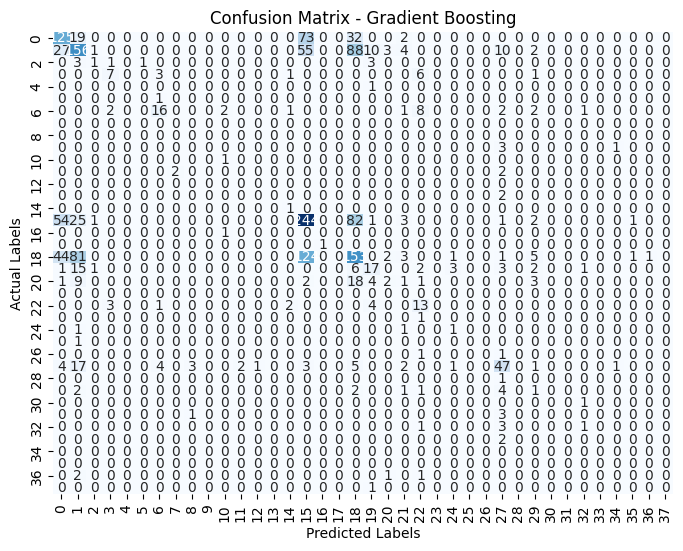

In [56]:
accuracy_scores = []
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    plot_confusion_matrix(y_test_labels, y_pred_labels, f'Confusion Matrix - {name}')

## Comparision of Algorithms

C:\Users\waret\AppData\Local\Temp\ipykernel_18780\3869205820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='pastel')


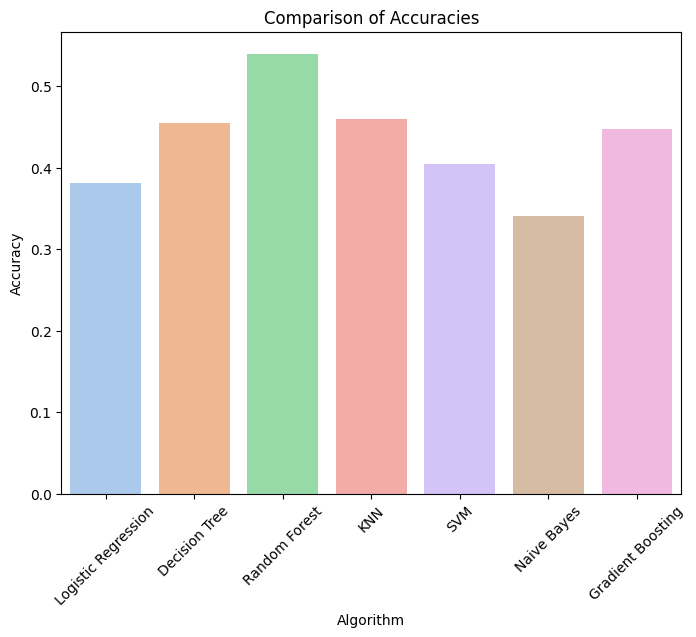

In [40]:
accuracy_df = pd.DataFrame({'Algorithm': classifier_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='pastel')
plt.title('Comparison of Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [43]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Weather_Label
0,1/1/2012 0:00,-1.8,-3.9,86,4.0,8.0,101.24,Fog,7
1,1/1/2012 1:00,-1.8,-3.7,87,4.0,8.0,101.24,Fog,7
2,1/1/2012 2:00,-1.8,-3.4,89,7.0,4.0,101.26,"Freezing Drizzle,Fog",9
3,1/1/2012 3:00,-1.5,-3.2,88,6.0,4.0,101.27,"Freezing Drizzle,Fog",9
4,1/1/2012 4:00,-1.5,-3.3,88,7.0,4.8,101.23,Fog,7
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30.0,9.7,100.13,Snow,35
8780,12/31/2012 20:00,0.2,-2.4,83,24.0,9.7,100.03,Snow,35
8781,12/31/2012 21:00,-0.5,-1.5,93,28.0,4.8,99.95,Snow,35
8782,12/31/2012 22:00,-0.2,-1.8,89,28.0,9.7,99.91,Snow,35


In [58]:
model = RandomForestClassifier(random_state=42)


In [61]:
 model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5395560614684121

In [62]:
import pickle
with open('weather_model.pkl', 'wb') as file:
    pickle.dump(model, file)